# Phone Tones

In [1]:
import synthingie as st


## Dial Tone

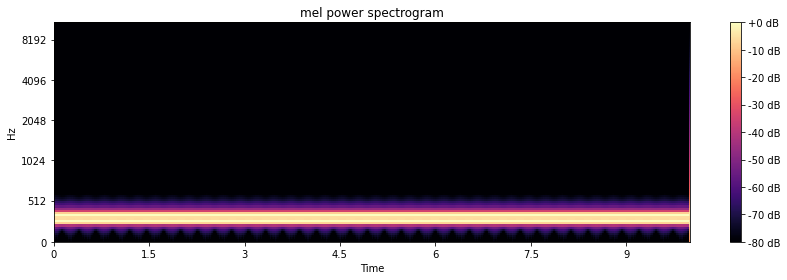

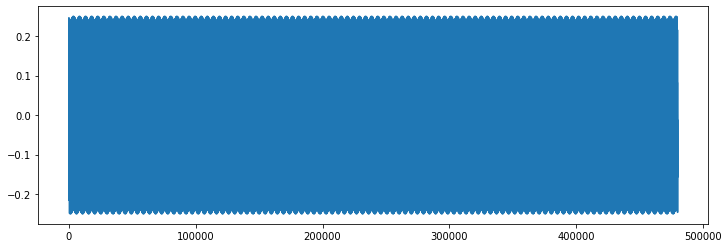

In [2]:
dial_tone = (st.Sin(440) + st.Sin(350)) * 0.125

dial_tone.render(10)

## Ringing Tone

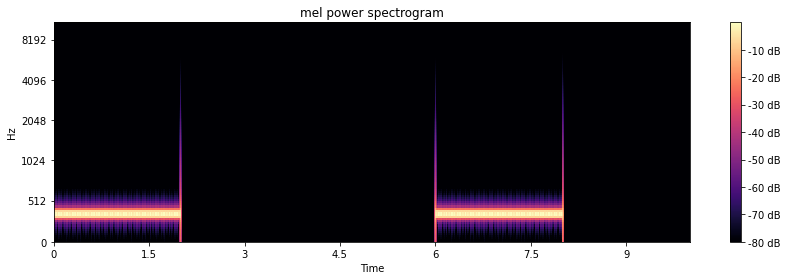

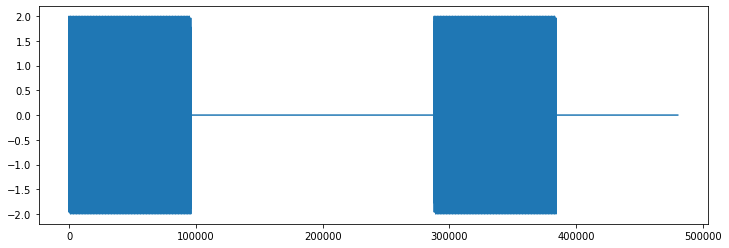

In [3]:
gate = (st.Metro(1).cumsum() -1) % 6 < 2
tone = st.Sin(480) + st.Sin(440)
ringing = tone * gate
ringing.render(10)

# Pulse dialing

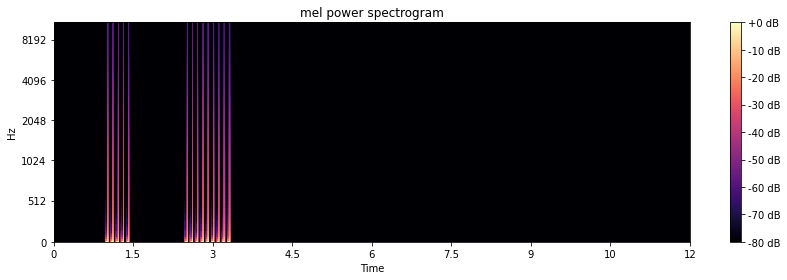

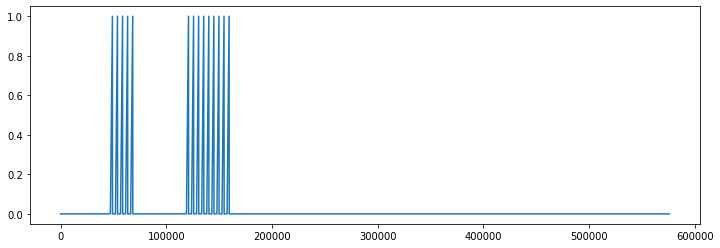

In [4]:
pulse = st.Line()
def dial_digit(number):
    return st.Sequence([
        st.Call(pulse.set, 
            (1., 0.), (1., 0.04), (0., 0.)
        ),
        st.score.Wait(0.1)
    ] * number)

sc = st.Wait(1) + dial_digit(5) + st.Wait(1) + dial_digit(9)
pulse.render(12, score=sc)

# Putting it all together

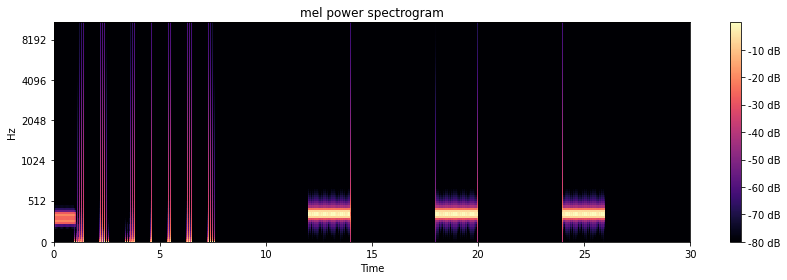

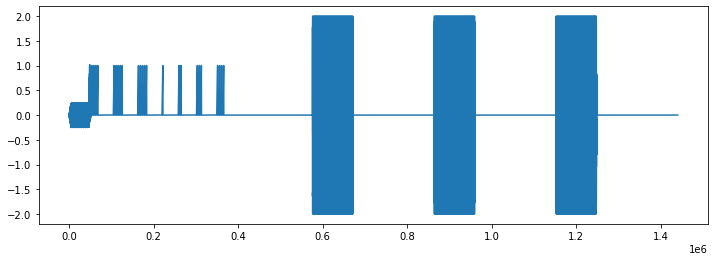

In [7]:
dial_tone_env = st.Line()
ringing_env = st.Line()
signal = dial_tone * dial_tone_env + ringing * ringing_env + pulse

def dial_number(phone_number):
    steps = []
    for digit in phone_number:
        digit = int(digit)
        steps.append(dial_digit(digit))
        steps.append(st.Wait(0.7))
    return st.Sequence(steps)
                     
sc = \
    st.Call(dial_tone_env.set, (1, 0.1)) + \
    st.Wait(1) + \
    st.Call(dial_tone_env.set, (0, 0.1)) + \
    dial_number("5551234") + \
    st.Wait(2) + \
    st.Call(ringing_env.set, (1, 0.1))
signal.render(30, score=sc)